# Preparación del dataset de créditos bancarios

## 1. Librerias y configuraciones previas


In [17]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math


# Preparación de datos
# ==============================================================================

from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [18]:
#reload(utils.funciones)

# Funciones externas
# ==============================================================================
from utils.funciones import multiple_plot

## 3. Carga del dataset

Este dataset extraido de *UCI* (nombrado: **german.data** ) contiene información sobre **aprobación de creditos bancarios**, los cuales serán usados para la predicción de un proceso de clasificación indicando si el cliente en bueno o malo, a partir de las diferentes variables.

A continuación una breve descripción de las variables:

****


| Columna                     | Descripción                                                   | Ejemplo |
|:-----------------------------|:---------------------------------------------------------------|:---------|
| checking_account_status     | Estado de la cuenta corriente del solicitante                 | < 0 DM     |
| loan_duration_mo            | Duración del préstamo en meses                                | 42      |
| credit_history              | Historial crediticio del solicitante                          | current loans paid     |
| purpose                     | Propósito del préstamo                                         | furniture/equipment     |
| loan_amount                 | Monto del préstamo en unidades monetarias                      | 7882    |
| savings_account_balance     | Saldo de la cuenta de ahorros del solicitante                  | < 100 DM     |
| time_employed_yrs           | Tiempo de empleo en años                                       | 4 - 7 years       |
| payment_pcnt_income         | Porcentaje del ingreso que se destina al pago del préstamo     | 2       |
| gender_status               | Estado civil y género del solicitante                          | male-single     |
| other_signators             | Indicador de si hay otros firmantes en el préstamo             | guarantor    |
| time_in_residence           | Tiempo de residencia en años                                   | 4       |
| property                    | Tipo de propiedad                                              | building society savings/life insurance    |
| age_yrs                     | Edad en años                                                  | 45      |
| other_credit_outstanding    | Indicador de si hay otros créditos en curso                     | none    |
| home_ownership              | Indicador de si el solicitante es dueño o inquilino de su hogar | for free|
| number_loans                | Número de préstamos existentes en el momento de la solicitud    | 1       |
| job_category                | Categoría laboral del solicitante                              | unskilled-resident	    |
| dependents                  | Número de personas que dependen del solicitante                 | 2       |
| telephone                   | Indicador de si el solicitante tiene un teléfono                 | yes    |
| foreign_worker              | Indicador de si el solicitante es trabajador extranjero         | yes    |
| bad_credit                  | Indicador de si el préstamo resultó en un incumplimiento        | 0       |


****

Url origen datos: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)


In [19]:
#Cargar el dataset
d=pd.read_csv('./datasets/02_GermanCredit.csv')

In [20]:
## Cargar datos con colab
## =============================================================================

#from google.colab import drive
#import os

#drive.mount('/gdrive')

In [21]:
#os.chdir("/gdrive/MyDrive/ModelosCuantitativosPython/Notebooks")
#!ls

In [22]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Customer ID               1000 non-null   int64 
 1   checking_account_status   1000 non-null   object
 2   loan_duration_mo          1000 non-null   int64 
 3   credit_history            1000 non-null   object
 4   purpose                   1000 non-null   object
 5   loan_amount               1000 non-null   int64 
 6   savings_account_balance   1000 non-null   object
 7   time_employed_yrs         1000 non-null   object
 8   payment_pcnt_income       1000 non-null   int64 
 9   gender_status             1000 non-null   object
 10  other_signators           1000 non-null   object
 11  time_in_residence         1000 non-null   int64 
 12  property                  1000 non-null   object
 13  age_yrs                   1000 non-null   int64 
 14  other_credit_outstanding 

In [23]:
d.head(2)

,Customer ID,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,0
1,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,...,real estate,22,none,own,1,skilled,1,none,yes,1


## 4. Limpieza de datos (Data Cleaning)

In [24]:
#Borrando columnas que no se emplearán
d.drop(['Customer ID'], axis='columns', inplace=True)

In [25]:
#Verificación y eliminación de registros duplicados

#Verificación de registros duplicados
d.loc[d.duplicated()]

,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit


## 5. Visualización de datos

### Variables de entrada

In [26]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head(2)

,checking_account_status,credit_history,purpose,savings_account_balance,time_employed_yrs,gender_status,other_signators,property,other_credit_outstanding,home_ownership,job_category,telephone,foreign_worker
0,< 0 DM,critical account - other non-bank loans,radio/television,unknown/none,>= 7 years,male-single,none,real estate,none,own,skilled,yes,yes
1,0 - 200 DM,current loans paid,radio/television,< 100 DM,1 - 4 years,female-divorced/separated/married,none,real estate,none,own,skilled,none,yes


In [27]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()

#Se elimina el elemento bad_credit de la lista de variables Categóricas
numCols.remove('bad_credit')

d[numCols].head(2)

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1


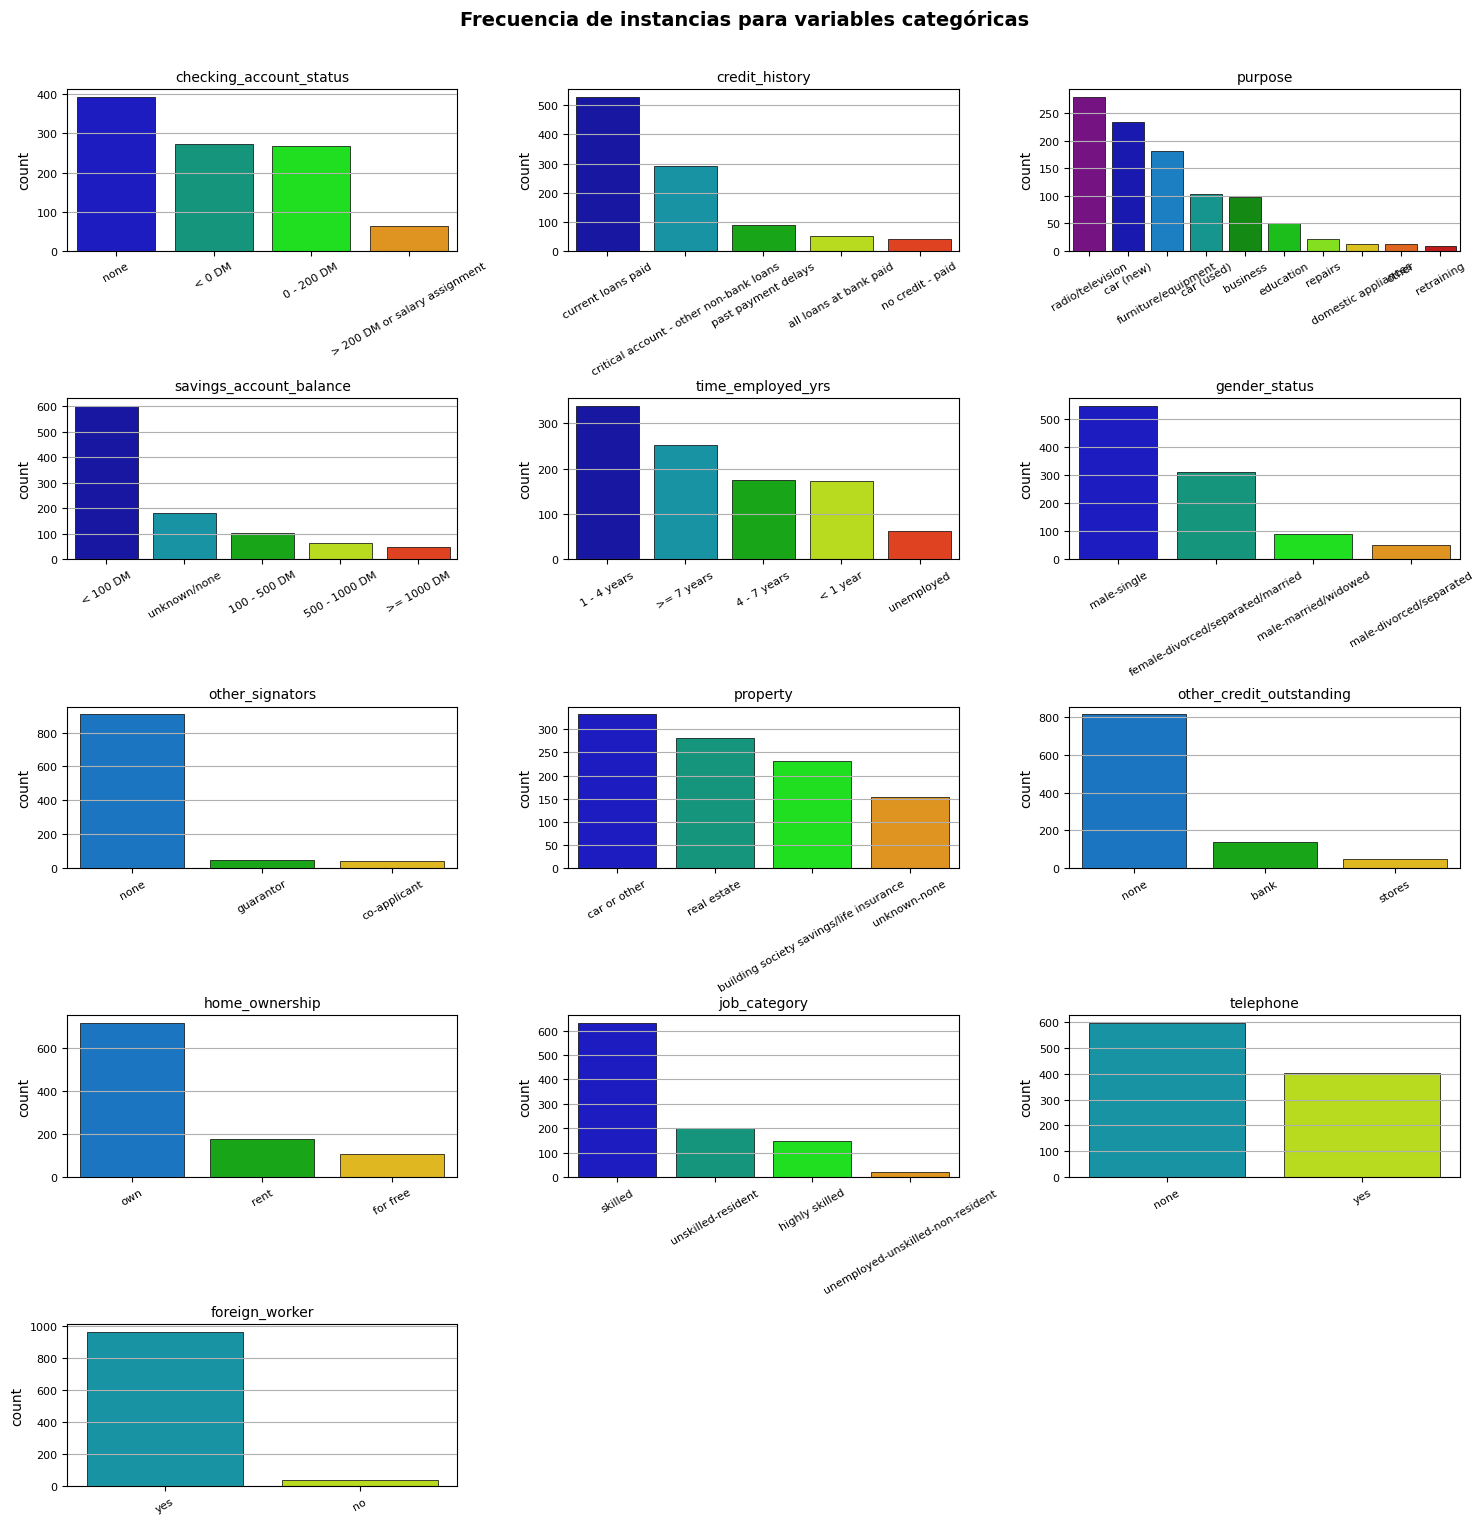

In [28]:
#Visualización de frecuencia de instancias para variables categóricas
multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [29]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(d[col].value_counts())
    print()

===== checking_account_status ====================
checking_account_status
none                             394
< 0 DM                           274
0 - 200 DM                       269
> 200 DM or salary assignment     63
Name: count, dtype: int64

===== credit_history ====================
credit_history
current loans paid                         530
critical account - other non-bank loans    293
past payment delays                         88
all loans at bank paid                      49
no credit - paid                            40
Name: count, dtype: int64

===== purpose ====================
purpose
radio/television       280
car (new)              234
furniture/equipment    181
car (used)             103
business                97
education               50
repairs                 22
domestic appliances     12
other                   12
retraining               9
Name: count, dtype: int64

===== savings_account_balance ====================
savings_account_balance
< 100 DM        

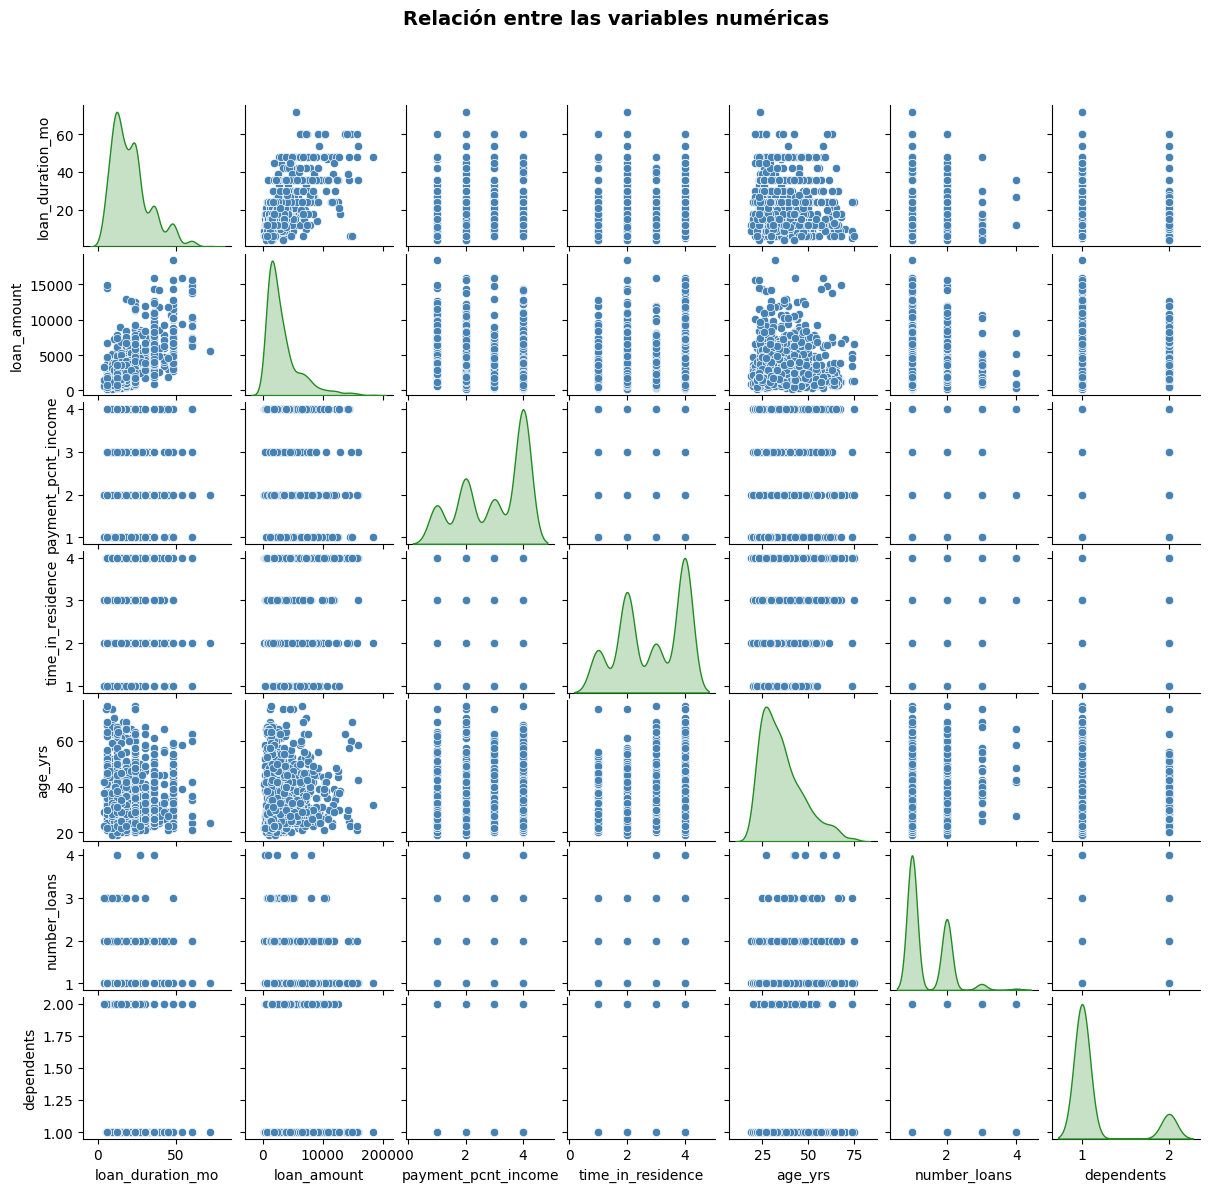

In [30]:
#Visualización de variables numéricas
multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

### Variable de salida

In [31]:
d.groupby('bad_credit').bad_credit.count().sort_values(ascending=False)

,bad_credit
bad_credit,
0,700
1,300


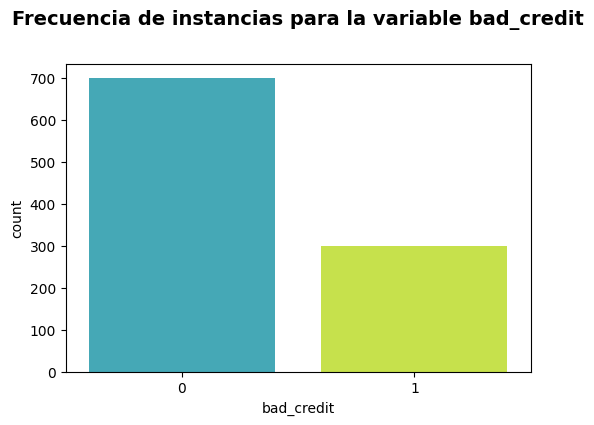

In [32]:
multiple_plot(1, d , None, 'bad_credit', 'countplot', 'Frecuencia de instancias para la variable bad_credit',0)

## 6. Preparación de datos

### Imputaciones

No se requiere imputaciones, solo se realizará la verificación de la completitud

In [33]:
# Identificación de valores nulos para las variables numéricas
for col in d[numCols]:
    print (col, np.sum(pd.isnull(d[col])))

loan_duration_mo 0
loan_amount 0
payment_pcnt_income 0
time_in_residence 0
age_yrs 0
number_loans 0
dependents 0


In [34]:
# Identificación de valores nulos para las variables categóricas
for col in d[catCols]:
    print (col, np.sum(pd.isnull(d[col])))

checking_account_status 0
credit_history 0
purpose 0
savings_account_balance 0
time_employed_yrs 0
gender_status 0
other_signators 0
property 0
other_credit_outstanding 0
home_ownership 0
job_category 0
telephone 0
foreign_worker 0


### Transformaciones

In [35]:
#Eliminación de categorias pequeñas para la variable Fuel Type

d['purpose'].value_counts().sort_values(ascending=False)

,count
purpose,
radio/television,280
car (new),234
furniture/equipment,181
car (used),103
business,97
education,50
repairs,22
domestic appliances,12
other,12


In [36]:
#Reemplazo de valores para la agrupación de categorías

#Diccionario con los reemplazos a realizar
reemplazos = {  "car (new)": "car"
              , "car (used)": "car"
              , "retraining": "education"
              , "domestic appliances": "repairs"}


#Se reemplazan los valores de acuerdo con el diccionario creado anteriormente
d['purpose'] = d['purpose'].map(reemplazos).fillna(d['purpose'])


#Visualización de las nuevos valores agrupados para la categoria 'Fuel Type'
d['purpose'].value_counts().sort_values(ascending=False)

,count
purpose,
car,337
radio/television,280
furniture/equipment,181
business,97
education,59
repairs,34
other,12


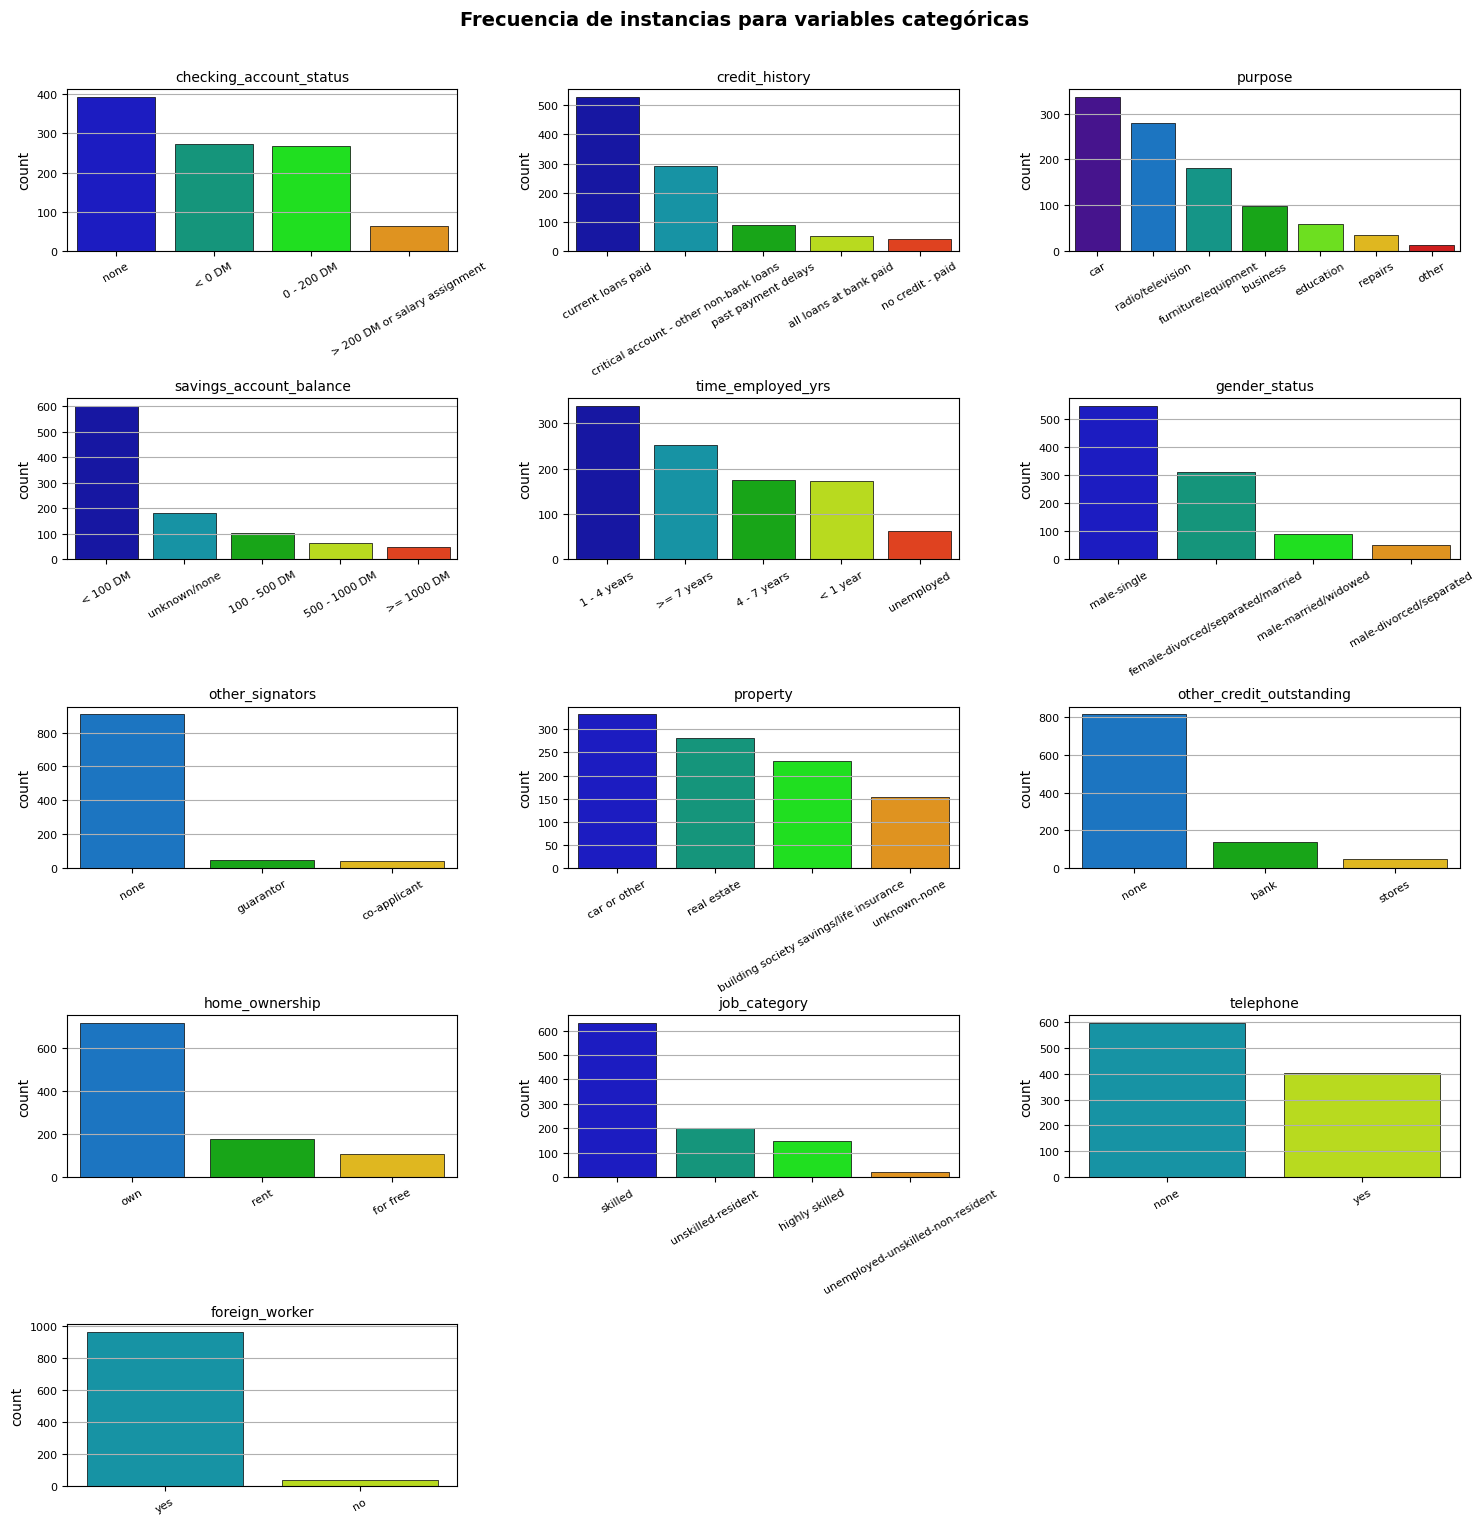

In [37]:
#Visualización de frecuencia de instancias para variables categóricas
multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [38]:
#Visualización de variables numéricas
#multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

### Datos de prueba

In [39]:
# Porcentaje de filas para la primera parte (por ejemplo, 90%)
percentage_first_part = 0.90

# Número de filas para la primera parte
n_rows_part1 = int(len(d) * percentage_first_part)

# Obtener índices aleatorios para la primer parte
indices_part1 = d.sample(n=n_rows_part1, random_state=123).index

# Obtener índices para la segunda parte (resto de las filas)
indices_part2 = d.index.difference(indices_part1)

# Dividir el DataFrame en dos partes
df = d.loc[indices_part1]
dp = d.loc[indices_part2]

### Valores atípicos para las variables de entrada

In [40]:
#utilización de LocalOutlierFactor con 13 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=13
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.1)

# identificar los valores atípicos por medio de lof
y_pred = lof.fit_predict(df[numCols])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', df[outliers].index.tolist())

Indices de valores atípicos:  [632, 221, 594, 983, 882, 917, 184, 933, 828, 4, 235, 898, 689, 677, 931, 769, 381, 90, 75, 272, 729, 13, 395, 74, 95, 444, 396, 887, 263, 469, 132, 952, 110, 774, 517, 148, 181, 547, 883, 987, 452, 560, 63, 553, 33, 116, 0, 783, 818, 748, 189, 70, 619, 333, 62, 888, 286, 413, 350, 495, 915, 851, 980, 639, 238, 337, 975, 454, 519, 627, 772, 312, 718, 442, 789, 557, 215, 907, 781, 956, 635, 490, 884, 58, 377, 315, 806, 539, 755, 67]


In [41]:
# Eliminar los valores atípicos del dataframe original
df = df.loc[~outliers]

In [42]:
df.shape

(810, 21)

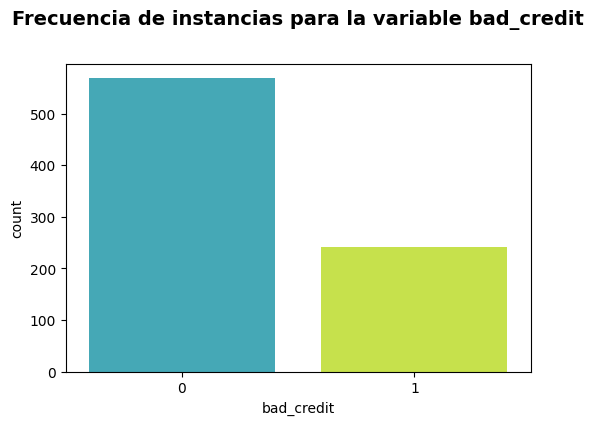

In [43]:
multiple_plot(1, df , None, 'bad_credit', 'countplot', 'Frecuencia de instancias para la variable bad_credit',0)

In [44]:
df.groupby('bad_credit').bad_credit.count().sort_values(ascending=False)

,bad_credit
bad_credit,
0,569
1,241


### Sobremuestreo (oversampling)

In [45]:
# Se crea un objeto RandomOverSampler que permite crear copias aleatorias de las muestras de la clase
# minoritaria para igualar el número de muestras entre las diferentes clases.
oversampler = RandomOverSampler()

# Se realiza el sobremuestreo para las variables de entrada y salida
X_resampled, y_resampled = oversampler.fit_resample(df.drop('bad_credit', axis=1), df['bad_credit'])

# Se crean dos dataframes con las variables de entrada y otro con la variable de salida a partir del proceso anterior
df1 = pd.DataFrame(X_resampled, columns=df.columns.drop('bad_credit'))
df2 = pd.DataFrame(y_resampled)

# Se concatenan los dataframes horizontalmente
df_balanced = pd.concat([df1, df2], axis=1)

df=df_balanced

In [46]:
df.shape

(1138, 21)

In [47]:
# Dataset balanceado
df.head(2)

,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,< 0 DM,12,critical account - other non-bank loans,car,3499,< 100 DM,1 - 4 years,3,female-divorced/separated/married,co-applicant,...,real estate,29,none,own,2,skilled,1,none,yes,1
1,< 0 DM,12,current loans paid,car,1168,< 100 DM,1 - 4 years,4,male-married/widowed,none,...,real estate,27,none,own,1,unskilled-resident,1,none,yes,0


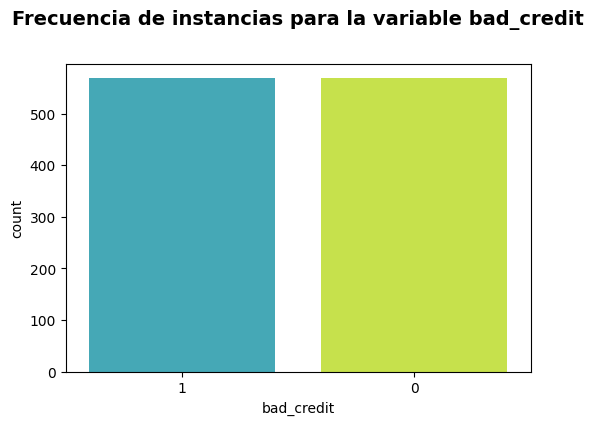

In [48]:
multiple_plot(1, df , None, 'bad_credit', 'countplot', 'Frecuencia de instancias para la variable bad_credit',0)

## 7. Exportar el dataset

In [49]:
# Exportamos el dataframe a un archivo CSV
df.to_csv('./datasets/02_GermanCredit_Prep.csv', index=False)
dp.to_csv('./datasets/02_GermanCredit_Prue.csv', index=False)

### Referencias


- *Dataset:*  
    - https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv
    
    
- *Machine learning con Python y Scikit-learn:*
    - https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html
    
    
- *LocalOutlierFactor:*
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
    

- *scikit-learn:*    
    - https://scikit-learn.org/stable/
    - https://scikit-learn.org/stable/user_guide.html
  
  
- *Gráficas con  seaborn:*
    - https://ichi.pro/es/como-utilizar-python-seaborn-para-analisis-de-datos-exploratorios-28897898172180

  